<a href="https://colab.research.google.com/github/vortexash/BI-machine-learning/blob/master/Ashish_cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pickle

In [0]:
import os


In [39]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
ls

drive/  gdrive/  sample_data/


In [41]:
cd /content/drive/My Drive/Colab Notebooks/cifar-10-batches-py

/content/drive/My Drive/Colab Notebooks/cifar-10-batches-py


In [42]:
test_batch = pickle.load(open('test_batch', 'rb'), encoding='bytes')
test_batch.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [0]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [0]:
test_batch = unpickle('test_batch')

In [45]:
test_batch.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [46]:
test_batch[b'labels']

[3,
 8,
 8,
 0,
 6,
 6,
 1,
 6,
 3,
 1,
 0,
 9,
 5,
 7,
 9,
 8,
 5,
 7,
 8,
 6,
 7,
 0,
 4,
 9,
 5,
 2,
 4,
 0,
 9,
 6,
 6,
 5,
 4,
 5,
 9,
 2,
 4,
 1,
 9,
 5,
 4,
 6,
 5,
 6,
 0,
 9,
 3,
 9,
 7,
 6,
 9,
 8,
 0,
 3,
 8,
 8,
 7,
 7,
 4,
 6,
 7,
 3,
 6,
 3,
 6,
 2,
 1,
 2,
 3,
 7,
 2,
 6,
 8,
 8,
 0,
 2,
 9,
 3,
 3,
 8,
 8,
 1,
 1,
 7,
 2,
 5,
 2,
 7,
 8,
 9,
 0,
 3,
 8,
 6,
 4,
 6,
 6,
 0,
 0,
 7,
 4,
 5,
 6,
 3,
 1,
 1,
 3,
 6,
 8,
 7,
 4,
 0,
 6,
 2,
 1,
 3,
 0,
 4,
 2,
 7,
 8,
 3,
 1,
 2,
 8,
 0,
 8,
 3,
 5,
 2,
 4,
 1,
 8,
 9,
 1,
 2,
 9,
 7,
 2,
 9,
 6,
 5,
 6,
 3,
 8,
 7,
 6,
 2,
 5,
 2,
 8,
 9,
 6,
 0,
 0,
 5,
 2,
 9,
 5,
 4,
 2,
 1,
 6,
 6,
 8,
 4,
 8,
 4,
 5,
 0,
 9,
 9,
 9,
 8,
 9,
 9,
 3,
 7,
 5,
 0,
 0,
 5,
 2,
 2,
 3,
 8,
 6,
 3,
 4,
 0,
 5,
 8,
 0,
 1,
 7,
 2,
 8,
 8,
 7,
 8,
 5,
 1,
 8,
 7,
 1,
 3,
 0,
 5,
 7,
 9,
 7,
 4,
 5,
 9,
 8,
 0,
 7,
 9,
 8,
 2,
 7,
 6,
 9,
 4,
 3,
 9,
 6,
 4,
 7,
 6,
 5,
 1,
 5,
 8,
 8,
 0,
 4,
 0,
 5,
 5,
 1,
 1,
 8,
 9,
 0,
 3,
 1,
 9,
 2,
 2,


In [47]:
test_batch[b'data'].shape

(10000, 3072)

In [0]:
# In color image every pixel has 3 numbers for RED. BLUE & GREEN 

In [0]:
import matplotlib.pyplot as plt

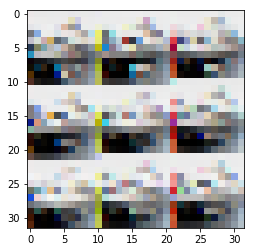

In [50]:
plt.imshow(test_batch[b'data'][1].reshape(32, 32, 3))

In [0]:
data_r = test_batch[b'data'][:, :1024].reshape(-1, 32, 32)
data_g = test_batch[b'data'][:, 1024:2*1024].reshape(-1, 32, 32)
data_b = test_batch[b'data'][:, 2*1024:].reshape(-1, 32, 32)

In [53]:
test_batch[b'data'].shape

(10000, 3072)

In [0]:
viewable_images = np.stack([data_r, data_g, data_b], axis=-1)

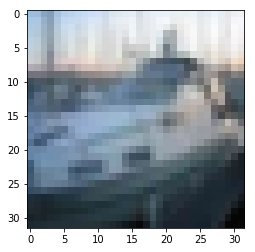

In [55]:
plt.imshow(viewable_images[2])

In [56]:
viewable_images.shape

(10000, 32, 32, 3)

In [57]:
labels = np.array(test_batch[b'labels'])
labels.shape

(10000,)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train_image, test_image, train_labels, test_labels = train_test_split(test_batch[b'data'], labels)

In [60]:
test_labels.shape

(2500,)

In [0]:
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D,Dropout,Activation,BatchNormalization
from keras.models import Sequential
from keras.utils import np_utils
from keras import regularizers

In [0]:

# normalize inputs from 0-255 to 0.0-1.0
train_image = train_image.astype('float32')
test_image = test_image.astype('float32')
train_image = train_image / 255.0
test_image= test_image/ 255.0

In [0]:
# one-hot encoding
train_labels = np_utils.to_categorical(train_labels)
test_labels = np_utils.to_categorical(test_labels)
num_classes = test_labels.shape[1]

In [0]:
weight_decay_rate = 0.01
model = Sequential()
model.add(Conv2D(32, (3,3),padding='same', kernel_regularizer=regularizers.l2(weight_decay_rate), input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay_rate)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay_rate)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay_rate)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay_rate)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay_rate)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay_rate)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['acc'])

In [0]:
 train_image, test_image, train_labels, test_labels = train_test_split(viewable_images, labels)

In [138]:
train_image.shape

(7500, 32, 32, 3)

In [165]:

model.fit(train_image, train_labels,validation_data=(test_image,test_labels) ,epochs=20,batch_size=45)

Train on 7500 samples, validate on 2500 samples
Epoch 1/20
7500/7500 [==============================] - 2s 330us/step - loss: 1.3190 - acc: 0.7641 - val_loss: 1.5792 - val_acc: 0.6712
Epoch 2/20
7500/7500 [==============================] - 2s 319us/step - loss: 1.2449 - acc: 0.7755 - val_loss: 1.5957 - val_acc: 0.6664
Epoch 3/20
7500/7500 [==============================] - 2s 319us/step - loss: 1.2635 - acc: 0.7617 - val_loss: 5.9295 - val_acc: 0.1876
Epoch 4/20
7500/7500 [==============================] - 2s 320us/step - loss: 1.2879 - acc: 0.7617 - val_loss: 1.5661 - val_acc: 0.6844
Epoch 5/20
7500/7500 [==============================] - 2s 319us/step - loss: 1.2663 - acc: 0.7635 - val_loss: 1.6211 - val_acc: 0.6744
Epoch 6/20
7500/7500 [==============================] - 2s 321us/step - loss: 1.2874 - acc: 0.7584 - val_loss: 1.5850 - val_acc: 0.6720
Epoch 7/20
7500/7500 [==============================] - 2s 322us/step - loss: 1.2793 - acc: 0.7652 - val_loss: 1.6484 - val_acc: 0.6644


In [131]:
model.predict(test_image[5:10]).argmax(axis=0)

array([0, 0, 3, 1, 1, 4, 1, 4, 0, 4])

In [0]:
def show_image(image_1d_vector):
    print(image_1d_vector.shape)
    plt.imshow(np.stack([image_1d_vector[:1024].reshape(32, 32), 
                         image_1d_vector[1024:2*1024].reshape(32, 32), 
                         image_1d_vector[2*1024:].reshape(32, 32)], axis=-1))

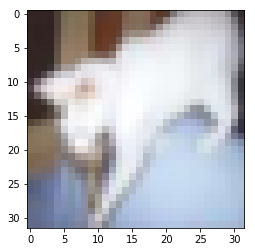

In [135]:
plt.imshow(test_image[0])

In [115]:
unpickle('batches.meta')[b'label_names']

[b'airplane',
 b'automobile',
 b'bird',
 b'cat',
 b'deer',
 b'dog',
 b'frog',
 b'horse',
 b'ship',
 b'truck']